# RFM Analizi ile Müşteri Segmentasyonu

*Müşterilerini segmentlere ayırmak isteyen bir e-ticaret şirketi bu segmentlere göre pazarlama stratejileri belirlemek istemektedir. Bunu gerçekleştirebilmek için müşterilerin davranışları tanımlanacak ve oluşan öbeklenmelere göre gruplar oluşturulacaktır. Ortak davranışlar sergileyenler aynı gruplarda yer alacak ve bu gruplara özel satış ve pazarlama teknikleri geliştirmeye çalışacaktır.*

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

*Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içermektedir. Bu şirket hediyelik eşya satışı yapmaktadır. Promosyon ürünleri gibi düşünebilir ve müşterilerinin çoğu da toptancıdır.*

**DEĞİŞKENLER**

- **InvoiceNo:** *Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.*
- **StockCode:** *Ürün kodu. Her bir ürün için eşsiz numara.*
- **Description:** *Ürün ismi.*
- **Quantity:** *Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.*
- **InvoiceDate:** *Fatura tarihi ve zamanı.*
- **UnitPrice:** *Ürün fiyatı.(Sterlin cinsinden)*
- **CustomerID:** *Eşsiz müşteri numarası.*
- **Country:** *Ülke ismi. Müşterinin yaşadığı ülke.*

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [191]:
df_2010_2011 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [192]:
df = df_2010_2011.copy()
#Hangi üründen kaç tane var?
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [193]:
#Eşsiz ürün sayısı kaçtır?
df["Description"].nunique()

4223

In [194]:
#En çok sipariş edilen ürün hangisidir?
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [195]:
#Toplam kaç fatura kesilmiştir?
df["Invoice"].nunique()

25900

In [196]:
#Fatura başına ortalama kaç para kazanılmıştır?
df["TotalPrice"] = df["Quantity"]*df["Price"]

In [197]:
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [198]:
#En pahalı ürünler hangileridir?
df.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970,15098,United Kingdom,-38970
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836,nan,United Kingdom,-17836
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888,nan,United Kingdom,-16888
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16454,nan,United Kingdom,-16454
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541,nan,United Kingdom,-13541


In [199]:
#Hangi ülkeden kaç sipariş geldi?
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8558
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [200]:
#Hangi ülke ne kadar kazandırdı?
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,8187806
Netherlands,284662
EIRE,263277
Germany,221698
France,197422


In [201]:
#En çok iade alan ürün hangisidir? 
#Invoice değişkeninde başında "C" ifadesi yer alan ürünler iptal edilmiştir. Veri setinde şu anda boş yani değerler bulunmaktadır.
#Bu yüzden str.contains komutu içinde na değerlerini False olarak tanımlayıp görmezden geliyoruz. 
#Adet işlemi için de "Quantity" değişkenini azalan şekilde sıralayarak en çoktan en aza doğru iadeleri sıralayabiliriz.
return_ = df[df["Invoice"].str.contains("C", na=False)]
return_.sort_values("Quantity", ascending = True).head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2,16446,United Kingdom,-168470
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1,12346,United Kingdom,-77184
4268,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0,15838,United Kingdom,-281


# Veri Ön İşleme

In [202]:
#Eksik değer olup olmadığına bakıyoruz.
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
TotalPrice          0
dtype: int64

In [203]:
df.shape

(541910, 9)

In [204]:
#Eksik değerleri veri setinden çıkarıyoruz.
df.dropna(inplace = True)
df.shape

(406830, 9)

In [205]:
#İstatistiksel değerleri, kartilleri inceleyerek veri seti hakkında bilgi ediniyoruz.
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,406830,12,249,-80995,-2,1,1,2,5,12,24,36,120,80995
Price,406830,3,69,0,0,0,1,1,2,4,7,8,15,38970
Customer ID,406830,15288,1714,12346,12415,12626,12876,13953,15152,16791,17719,17905,18212,18287
TotalPrice,406830,20,428,-168470,-10,1,2,4,11,20,35,67,200,168470


# Kutu Grafiği ile Aykırı Gözlem Analizi

In [206]:
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"→ YES")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "→ NO")

Quantity → YES
948
Price → YES
846
TotalPrice → YES
1030


temiz_df=df[~((df[feature] > upper) | (df[feature] < lower)).any(axis=None)]

# RFM Skorları

RFM ifadesi Recency, Frequency, Monetary ifadelerinin baş harflerinden oluşur.
Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

- Recency (Yenilik): Müşterinin son satın almasından bugüne kadar geçen süre

Diğer bir ifadesiyle “Müşterinin son temasından bugüne kadar geçen süre” dir. (Bugünün tarihi - Son satın alma) şeklinde bulunur.
Bugünün tarihi - son ürün satın alma tarihi. Çıkan değeri küçük olması istenir.

- Frequency (Sıklık): Toplam satın alma sayısı.

- Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
 8   TotalPrice   406830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


# Recency Hesabı

In [208]:
#Alışveriş yapılan ilk günü buluyoruz.
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [209]:
#Alışveriş yapılan son günü buluyoruz.
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [210]:
#İnceleyeceğimiz veriler 2010-2011 yılları arasında olduğu için bugünün tarihini kendimiz belirliyoruz.
import datetime as dt
today_date = dt.datetime(2011,12,9)
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [211]:
#Müşteri ID'sine göre son yapılan alışveriş tarihlerine ulaşıyoruz.
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:17:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [212]:
#(Bizim belirlediğimiz bugünün tarihi - alışveriş yapılan son tarih) işlemi yapıldığında recency değerini buluyoruz.
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
temp_df.head()

,Recency
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [213]:
#Saat değerlerini silmek için, daha önce burası Invoice Date değişkeni ve veri tipi datetime olduğu için days'leri seçip saatleri siliyoruz.
recency_df = temp_df["Recency"].apply(lambda x: x.days)
recency_df.head()

Customer ID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64

# Frequency Hesabı

In [214]:
temp_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
temp_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
            C541433        1
12347       537626        31
            542237        29
            549222        24

In [215]:
#Her müşteri kaç alışveriş yapmış toplamda bunu buluyoruz.
temp_df.groupby("Customer ID").agg({"Invoice":"count"}).head()

,Invoice
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [216]:
#Yukarıda yapmış olduğumuz işlemi bir değişkene atayıp "Invoice" yazan değişkeni de "Frequency" olarak değiştirip gözlemliyoruz.
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


# Monetary Hesabı

In [217]:
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [218]:
#Sutün adlandırmasını değiştiriyoruz.
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True)
monetary_df.head()

,Monetary
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [219]:
print(recency_df.shape,freq_df.shape,monetary_df.shape)

(4372,) (4372, 1) (4372, 1)


# RFM Analizi 

*RFM Analizi için gerekli olan parametreler hesaplandıktan sonra yorum yapabilmek için bazı işlemler yapacağız.*

In [220]:
#Parametreleri bir dataframe olarak concat fonksiyonu yardımı ile birleştiriyoruz.
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,2,0
12347,1,7,4310
12348,74,4,1797
12349,17,1,1758
12350,309,1,334


In [221]:
#Değerler görüldüğü üzere 1 ile 5 arasında olan değerlerdir. 5 çok iyi, 1 ise çok kötü anlamına gelmektedir.
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,324,2,0,1,2,1
12347,1,7,4310,5,4,5
12348,74,4,1797,2,3,4
12349,17,1,1758,4,1,4
12350,309,1,334,1,1,2


In [222]:
#Skorları yanyana yazdırıyoruz.
(rfm['RecencyScore'].astype(str) + 
 rfm['FrequencyScore'].astype(str) + 
 rfm['MonetaryScore'].astype(str)).head()

Customer ID
12346    121
12347    545
12348    234
12349    414
12350    112
dtype: object

In [223]:
#RFM_SCORE sütununu Dataframe tablosuna ekliyoruz.
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,324,2,0,1,2,1,121
12347,1,7,4310,5,4,5,545
12348,74,4,1797,2,3,4,234
12349,17,1,1758,4,1,4,414
12350,309,1,334,1,1,2,112


In [224]:
#Betimsel istatistikleri inceliyoruz.
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372,91,101,-1,15,49,142,372
Frequency,4372,5,9,1,1,3,5,248
Monetary,4372,1898,8219,-4288,293,648,1612,279489


In [225]:
#En iyi müşteriler gösterilmektedir.
rfm[rfm["RFM_SCORE"] == "555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12362,2,13,5155,5,5,5,555
12417,2,12,3579,5,5,5,555
12437,0,19,4897,5,5,5,555
12471,1,49,18741,5,5,5,555
12476,0,20,6547,5,5,5,555


In [226]:
#En kötü müşteriler gösterilmektedir.
rfm[rfm["RFM_SCORE"] == "111"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353,203,1,89,1,1,1,111
12361,286,1,190,1,1,1,111
12401,302,1,84,1,1,1,111
12402,322,1,226,1,1,1,111
12441,365,1,174,1,1,1,111


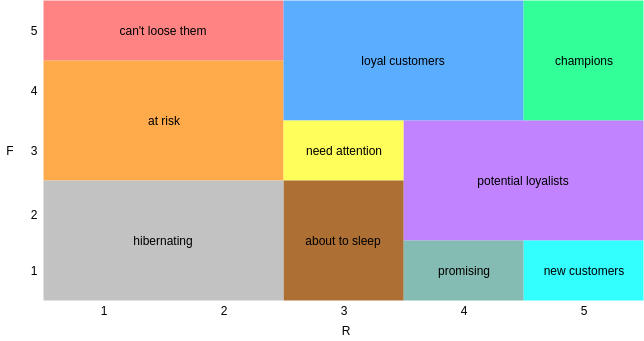

In [227]:
#RFM skorlarına göre müşterileri sınıflara atıyoruz. Bu sınıfların hangi skor aralığında olacağı aşağıda belirtilmiştir. 
#Örnek olarak Hibernating sınıfı şu skor değerlerine sahiptir. 
#Recency değeri 1-2, Frequency değeri 1-2 olanlardır diğer sınıflarda bu şekilde okunmaktadır.
#Buraya sadece Recency ve Frequency eklenmesinin sebebi tabloda sadece bu iki parametre yer almaktadır.
#Ancak Monetary de eklenebilir.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [228]:
#Yukarıda tanımlanan seg_map'i dataframe tablosuna dahil ediyoruz.
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,324,2,0,1,2,1,121,Hibernating
12347,1,7,4310,5,4,5,545,Champions
12348,74,4,1797,2,3,4,234,At Risk
12349,17,1,1758,4,1,4,414,Promising
12350,309,1,334,1,1,2,112,Hibernating


In [229]:
#Segmentlere göre groupby yaparak elde edilen 3 parametrenin ortalama ve kaç adet olduğunu buluyoruz.
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About to Sleep           51   369         1   369      435   369
At Risk                 157   603         3   603      951   603
Can't Loose             132    68        10    68     2381    68
Champions                 4   665        15   665     6510   665
Hibernating             216  1053         1  1053      376  1053
Loyal Customers          31   795         8   795     2703   795
Need Attention           48   190         3   190      790   190
New Customers             5    42         1    42      377    42
Potential Loyalists      15   490         2   490      684   490
Promising                21    97         1    97      303    97

In [230]:
#"Need Attention" grubunu yakalıyoruz.
rfm[rfm["Segment"] == "Need Attention"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12360,51,3,2662,3,3,5,335,Need Attention
12370,50,4,3546,3,3,5,335,Need Attention
12372,70,3,1298,3,3,4,334,Need Attention
12546,45,3,1142,3,3,4,334,Need Attention
12759,51,3,1531,3,3,4,334,Need Attention


In [231]:
#Dikkat gerektiren müşterilerin Customer ID (indeks) değerlerine erişilmiştir.
#Yeni müşterilere özel promosyonlar ve mailler bu ID'ler sayesinde atılabilir.
rfm[rfm["Segment"] == "Need Attention"].index

Float64Index([12360.0, 12370.0, 12372.0, 12546.0, 12759.0, 12808.0, 12822.0,
              12886.0, 12895.0, 13032.0,
              ...
              18170.0, 18194.0, 18205.0, 18228.0, 18235.0, 18252.0, 18261.0,
              18270.0, 18277.0, 18287.0],
             dtype='float64', name='Customer ID', length=190)

In [232]:
#Yeni bir dataframe oluşturularak içerisine Need Attention grubuna ait müşterilerin ID bilgileri atıyoruz.
new_df = pd.DataFrame()
new_df["NewCustomerID"] = rfm[rfm["Segment"] == "Need Attention"].index
new_df.head()

,NewCustomerID
0,12360
1,12370
2,12372
3,12546
4,12759


In [233]:
#Atanan bu ID'ler csv çıktısı alınarak kullanıma hazır hale getirilmiştir.
new_df.to_csv("new_customers.csv")

# Yorumlama

In [234]:
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count","max"]).head(10)

Recency            Frequency            Monetary        \
                       mean count  max      mean count  max     mean count   
Segment                                                                      
About to Sleep           51   369   70         1   369    2      435   369   
At Risk                 157   603  371         3   603    7      951   603   
Can't Loose             132    68  311        10    68   35     2381    68   
Champions                 4   665   10        15   665  248     6510   665   
Hibernating             216  1053  372         1  1053    2      376  1053   
Loyal Customers          31   795   70         8   795   76     2703   795   
Need Attention           48   190   70         3   190    4      790   190   
New Customers             5    42   10         1    42    1      377    42   
Potential Loyalists      15   490   30         2   490    4      684   490   
Promising                21    97   30         1    97    1      303    97   

                            
                       max  
Segment                     
About to Sleep        6208  
At Risk              21536  
Can't Loose          10217  
Champions           279489  
Hibernating           7830  
Loyal Customers     123725  
Need Attention        3546  
New Customers         3861  
Potential Loyalists  12394  
Promising             1758

Yorum yaparken Recency değerinin düşük, Frequency değerinin yüksek ve Monetary değerinin yüksek olmasını dikkate alacağız.
Buna göre seçilecek olan 4 grup şunlardır;

- Champions
- Can't Loose
- Loyal Customers
- Need Attention

**Champions**

665 kişi bulunan bu grupta ortalama olarak en son alışveriş 4 gün önce gerçekleşmiş,
alışveriş sıklıkları 15, toplamda 248 alışveriş var, ort. 6510 dolar/TL harcamaları var.

**Can't Loose**

68 kişi bulunan bu grupta ortalama olarak en son alışveriş 132 gün önce gerçekleşmiş,
alışveriş sıklıkları 10, toplamda 35 alışverişleri var, ort. 2381 dolar/TL harcamaları var.

**Loyal Customers**

795 kişi bulunan bu grupta ortalama olarak en son alışveriş 31 gün önce gerçekleşmiş,
alışveriş sıklıkları 8, toplamda 76 alışverişleri var, ort. 2703 dolar/TL harcamaları var.

**Need Attention**

190 kişi bulunan bu grupta ortalama olarak en son alışveriş 48 gün önce gerçekleşmiş,
alışveriş sıklıkları 3, toplamda 4 alışverişleri var, ort. 790 dolar/TL harcamaları var.


_**AKSİYON ÇALIŞMALARI**_

- Champions grubundaki müşteriler büyük ihtimalle toplam gelirin yüksek bir yüzdesini oluşturmaktadır. Bu nedenle onları memnun etmeye odaklanmak en büyük öncelik olmalıdır. Tercihlerini daha iyi araştırıp analiz ederek, daha kişiselleştirilmiş ve özel fırsatlar oluşturulmalıdır. Ürünleri onlar için özelleştirerek promosyon şeklinde göndermek hem onları memnun edeceek hem de ürünün tanıtımı açısından yararlı olacaktır.

- Can't Loose grubuna çok dikkat ve önem verilmelidir. Bu kaybedilmek istenmeyen gruptur. Toplam gelirde hatrı sayılır yüzdeye sahiplerdir. Toplu bir şekilde alışveriş yapıp uzun bir süre tekrar alışveriş yapmamaktadırlar. Bu gruba özel promosyonlar hazırlanarak firma bünyesinde tutulabilirler.

- Loyal Customers grubundaki kişilere popüler ürünler indirimli olarak önerilebilir. Toplam yapılan alışveriş sayısı 76'dır ve oldukça yüksek bir sayıdır.

- Need Attention grubundaki kişilere sınırlı süreli teklifler yapılabilir. Bu onları harekete geçirerek alışveriş yapma eylemine itecektir. Geçmiş satın alımlar incelenerek tavsiyelerde bulunulmalıdır. Bu onları yeniden etkin hale getirecektir.